<a href="https://colab.research.google.com/github/dvillanueva123/Cd-202202_Darinel_Villanueva/blob/main/TallerKripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Función K de Ripley**
La función K, propuesta por Brian D. Ripley en 1976, representa la media observada del número de puntos dentro de una distancia definida dividida por la densidad de puntos en el área de estudio.

La forma general de la función K está dada por la ecuación:

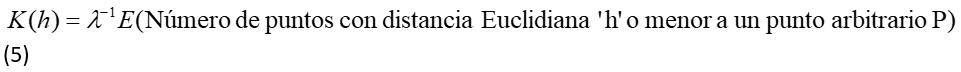

Donde λ es la densidad de puntos en el área. El valor de la función K para un fenómeno aleatoriamente distribuido es igual a πh^2.

Para estimar el valor de la función K se parte del valor estimado de E, denominado operador de expectación, que para espacios planos se estima mediante la ecuación:

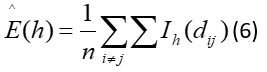

Donde h es la distancia máxima entre los puntos a ser tomada en consideración, n es el número total de puntos, dij es la distancia euclidiana entre dos puntos i y j, Ih() es una función de peso con valor uno (1) cuando la distancia entre los puntos es menor o igual a h y valor cero (0) cuando esta distancia es superior a h y R es el área del espacio estudiado. La densidad de puntos λ se puede estimar como:

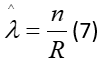

Al remplazar las funciones (6) y (7) sobre la función (5) se obtiene el estimador de la función K para espacios planos dado por la ecuación:

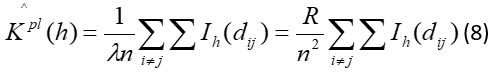

La siguiente figura muestra las distancias dij menores o iguales a h para dos puntos arbitrarios dentro del área de estudio.

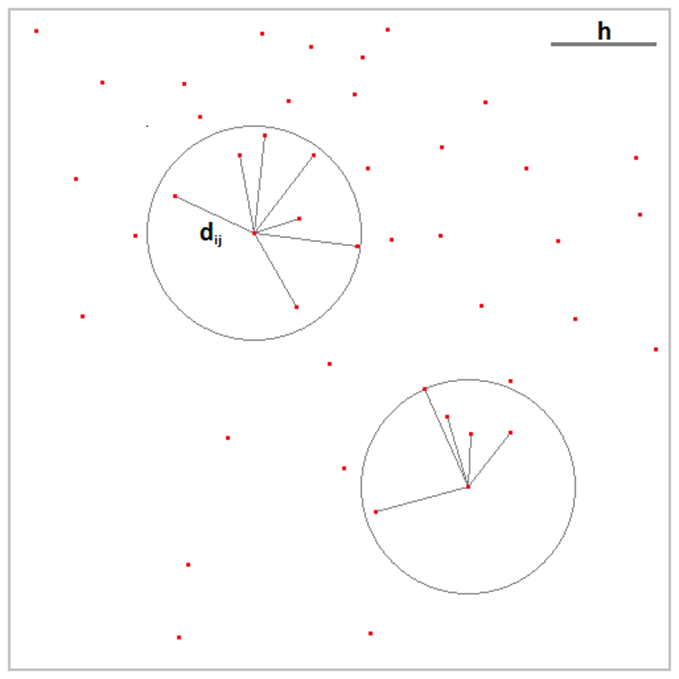

La función K puede ser utilizada para determinar si una serie de puntos ubicados sobre un espacio tienden a formar grupos o por el contrario se distribuye de forma aleatoria; una forma de poner a prueba estas afirmaciones es por medio de simulaciones de Monte Carlo. Para esto se genera una gran cantidad de conjuntos aleatorios de puntos sobre el mismo espacio (por ejemplo 1.000 conjuntos), la función K se aplica con diferentes valores de h (distancia máxima entre puntos a tenerse en cuenta) sobre cada uno de los conjuntos de datos aleatorios generados y sobre el conjunto original de puntos. Con los resultados de la función K sobre los conjuntos aleatorios para cada valor de h se definen intervalos de confianza, por ejemplo del 95% (entre el valor que ocupa el percentil 2,5 y el valor que ocupa el percentil 97,5), si el valor de la función K para el conjunto de datos original es superior al intervalo de confianza definido se puede concluir que existe tendencia estadísticamente significativa a formar agrupaciones y por lo tanto la distribución de los datos sobre el espacio no es aleatoria.

In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.3 MB/s 


In [ ]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 43.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [ ]:
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669740 sha256=7b11850f16cf3960f6adde678f22c6df6dcd14ea58c6736cd5672ed9d1c98afe
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely


In [ ]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 1.0 MB 46.3 MB/s 
     |████████████████████████████████| 19.3 MB 385 kB/s 
     |████████████████████████████████| 16.7 MB 390 kB/s 


In [ ]:
import pandas as pd
import pyproj
import sys
import urllib
import cartopy.io.shapereader as shapereader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

In [ ]:
import pandas as pd
import pyproj
import sys
import urllib
import cartopy.io.shapereader as shapereader
import matplotlib.pyplot as plt
import cartopy.crs as crs
import geopandas as gpd
import pandas as pd
import earthpy as et
import shapely
from geopandas.tools.geocoding import Point
import numpy as np


In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [ ]:
def calcularDistancia(x1,y1,x2,y2):
  distancia=((x1-x2)**2+(y1-y2)**2)**(1/2)
  return distancia

In [ ]:
#Función K de Ripley
h=100
listaPuntos = []
for i in range(df.shape[0]):
  listaPuntos.append((df['x'][i], df['y'][i]))

  

contador=0
for i in range(len(listaPuntos)):
  x1= listaPuntos[i][0]
  y1= listaPuntos[i][1]
  for j in range(i+1, len(listaPuntos)):
    x2= listaPuntos[j][0]
    y2= listaPuntos[j][1]
    if (calcularDistancia(x1,y1,x2,y2)<=h):
      contador+=1
contador

3978

In [ ]:
#se carga la cartografia de Floridablanca
url='https://foscal.net/cartografia/'

file_list=["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd","68276_urbano.shp", "68276_urbano.shx"]
for file in file_list:
    urllib.request.urlretrieve(url+file,file)  

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


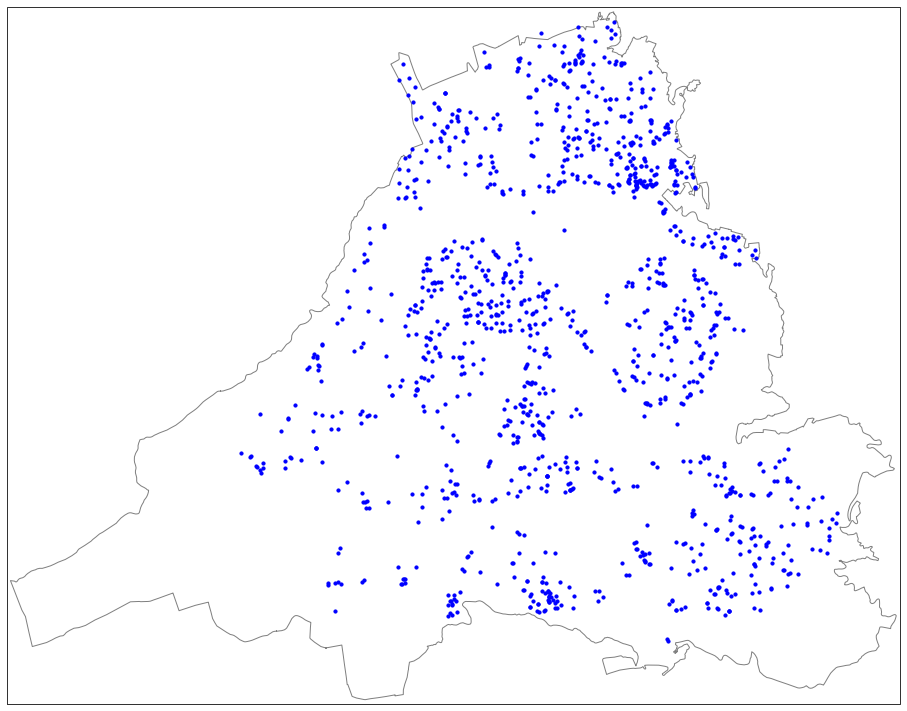

In [ ]:
subplot_kw=dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)
#Mapa de Floridablanca
lower_lon=-73.1325
upper_lon=-73.0732
lower_lat=7.053
upper_lat=7.0993

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader=shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
  ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='White', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
ax.add_line
plt.show()  

In [ ]:
import random
listaNumerosx = []
listaNumerosy = []
for i in range(df.shape[0]):
  numero1=random.uniform(-73.1325,-73.0732)
  numero2=random.uniform(7.053,7.0993)
  listaNumerosx.append(numero1)
  listaNumerosy.append(numero2)

print(listaNumerosx)
print(listaNumerosy)

[-73.1281041992679, -73.07741039260326, -73.11896511461437, -73.12943386938993, -73.08632591052813, -73.10831278434014, -73.1105214955088, -73.10769865218127, -73.1068696598957, -73.08978710212122, -73.08770369280603, -73.08408605784194, -73.13024741938959, -73.11497686117798, -73.10069019621527, -73.12116665902697, -73.08084692748947, -73.07380734438185, -73.09017904297933, -73.10008073854338, -73.10994105072547, -73.10651579112843, -73.11409702506319, -73.11835859161306, -73.10921529945611, -73.10136044753719, -73.07884311516362, -73.09754852746686, -73.12397959918457, -73.07616595174427, -73.09495378387274, -73.12641700112547, -73.1263508535243, -73.10745122134018, -73.11829003160824, -73.07789884387851, -73.08642219220562, -73.08678066274912, -73.10599683782053, -73.0946671721712, -73.10864365668928, -73.11586447772982, -73.12638995490464, -73.10465207725692, -73.11545023404881, -73.08882754939552, -73.07609599954225, -73.09221950963705, -73.08082886312856, -73.08768742146776, -73.

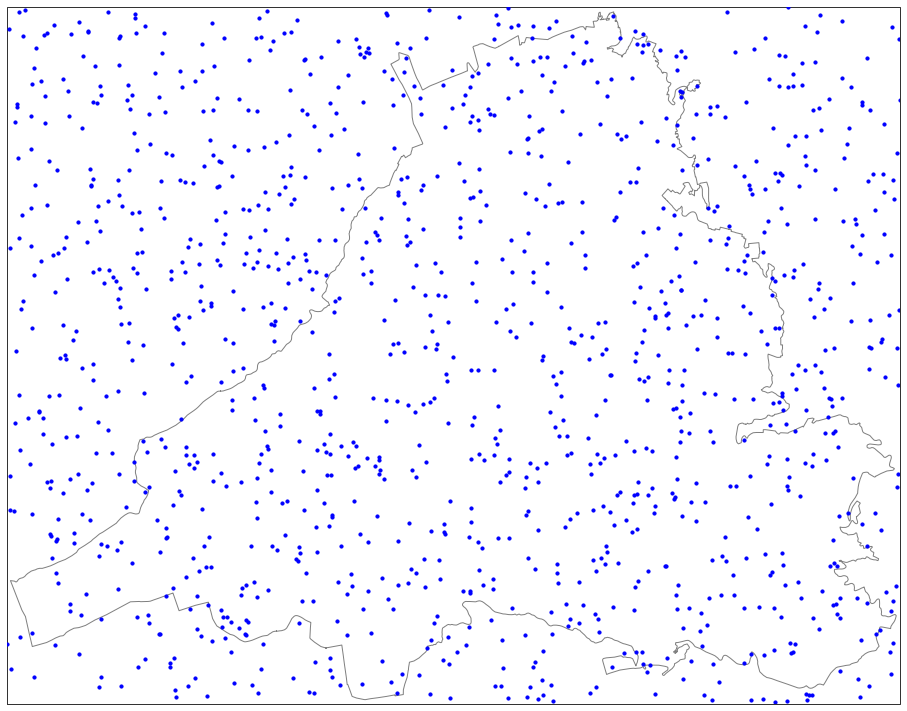

In [ ]:
subplot_kw=dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)
#Mapa de Floridablanca
lower_lon=-73.1325
upper_lon=-73.0732
lower_lat=7.053
upper_lat=7.0993

x_min, y_min = P(lower_lon, lower_lat)
x_max, y_max = P(upper_lon, upper_lat)



ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader=shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
  ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='White', edgecolor='gray')

ax.scatter(listaNumerosx, listaNumerosy, zorder=10, c='b', s=10)
ax.add_line
plt.show()  

In [ ]:
fp=r"68276_urbano.shp"
data= gpd.read_file(fp)
data_copy=data.copy()
crs=pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
data_copy=data_copy.to_crs(crs)
data['poly_area']=data_copy['geometry'].area
area=float(data['poly_area'])
area

17030066.989459652

In [ ]:
def funcionK(listaPuntos, area, h):
  #Calculando el valor estimado de k
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)):
      if calcularDistancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK

In [ ]:
data_copy['geometry']

0    POLYGON ((712728.126 781869.140, 712728.588 78...
Name: geometry, dtype: geometry

In [ ]:
tuplaAux=(random.random()*(x_max-x_min)+x_min, random.random()*(y_max-y_min)+y_min)
(tuplaAux, x_min, x_max, y_min, y_max)

((706959.7402416923, 783795.6740985258),
 706279.5972622973,
 712810.8849471859,
 780020.7283520092,
 785168.5262871928)

In [ ]:
poligono= data_copy['geometry'][0]
listak=[]
for i in range(1):
  listaAux=[]
  contAux=0
  while contAux < len(listaPuntos):
    tuplaAux=(random.random()*(x_max-x_min)+x_min, random.random()*(y_max-y_min)+y_min)
    puntoAux=Point(tuplaAux)
    if puntoAux.within(poligono):
      listaAux.append(tuplaAux)
      contAux+=1
    
  listak.append((listaAux))
listak


[[(710653.163778082, 781472.9467144962),
  (708750.4629921159, 782268.9727334734),
  (709215.8129266415, 782266.7964326524),
  (709644.9493610357, 780799.7950441297),
  (709447.4012144097, 780832.0731421512),
  (711299.2435774525, 783427.3932624266),
  (709589.5515710826, 783129.8474933553),
  (709316.8495741818, 780505.7492098894),
  (709499.6626925262, 781783.2767517213),
  (708334.8527248342, 782249.2278629544),
  (708421.641495527, 781540.0076603582),
  (708811.1652513811, 781229.6746917384),
  (710015.2803592376, 781198.2847244466),
  (707630.2222624618, 781240.1667172619),
  (709256.5901107889, 782904.6582564781),
  (711169.4711300995, 782207.1469583283),
  (706438.0169422745, 780593.2060063299),
  (710270.5120608956, 782441.3525625974),
  (709329.4499278984, 783366.943804789),
  (711526.2570016301, 780760.6964115959),
  (712572.9458731036, 780627.7819210537),
  (709920.3984483931, 784166.4347794692),
  (710901.3742460811, 783619.707906071),
  (710205.9767279191, 783421.115122985

In [ ]:
for manzana in reader.geometries():
  ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='White', edgecolor='gray')

ax.scatter(listaNumerosx, listaNumerosy, zorder=10, c='b', s=10)
ax.add_line
 

<bound method _AxesBase.add_line of <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f8fa4859410>>

In [ ]:

ax.scatter(listaAux[0], listaAux[1], zorder=10, c='b', s=10)
ax.add_line
plt.show()  

In [ ]:
plt.show() 

In [ ]:
listaDatos=[]
for h in range(10, 201, 10):
  #se calcula el k real
  kReal=funcionK(listaPuntos, area, h)

  #se generan 999 valores aleatorios de k
  listaK=[]
  for listaAux in listak:
    listaK.append(funcionK(listaAux, area, h))
  listaK.append(kReal)
  listaK.sort()

  p25, p975=np.percentile(listaK, (2.5, 97.5))
  listaDatos.append([h,kReal,p25, p975])

In [ ]:
listaPuntos=listak[0]
dfPuntos=pd.DataFrame(listaPuntos,columns=("x","y"))


In [ ]:
df['x'],df['y']=P(df['longitud'],df['latitud'])

In [ ]:
dfPuntos

,x,y
0,710653.163778,781472.946714
1,708750.462992,782268.972733
2,709215.812927,782266.796433
3,709644.949361,780799.795044
4,709447.401214,780832.073142
...,...,...
1257,707614.724794,781771.683926
1258,711234.079422,781073.352942
1259,709979.926853,783556.535762
1260,709113.077002,782588.290968


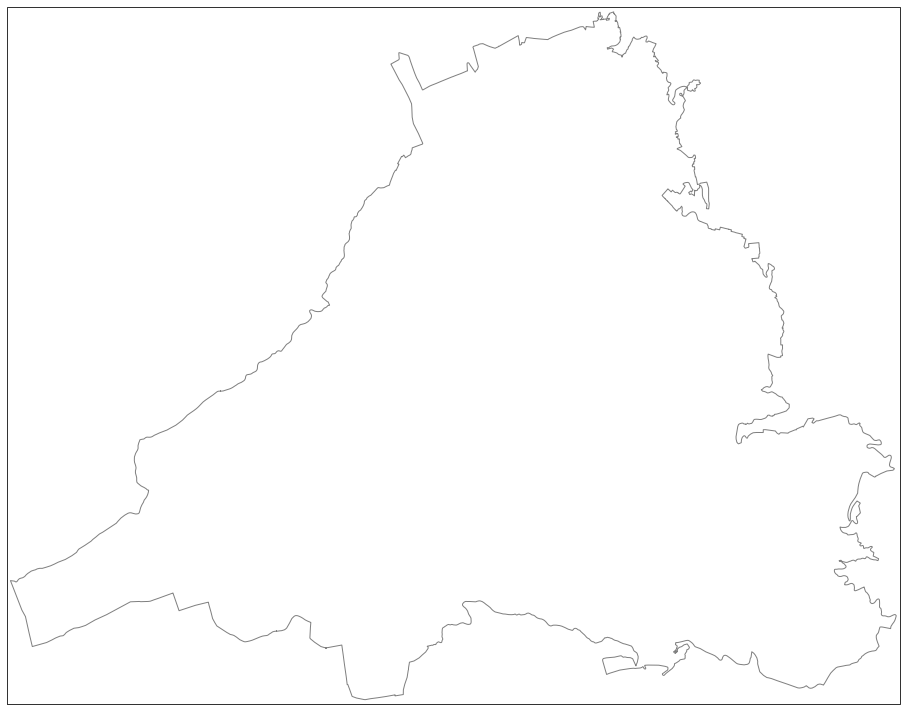

In [ ]:
subplot_kw=dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)
#Mapa de Floridablanca
lower_lon=-73.1325
upper_lon=-73.0732
lower_lat=7.053
upper_lat=7.0993

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader=shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
  ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='White', edgecolor='gray')

ax.scatter(listak, listak, zorder=10, c='b', s=10)
ax.add_line
plt.show()  